In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
world_artists = pd.read_csv("../data/top-world-artists.csv")
vn_artists = pd.read_csv("../data/top-vn-artists.csv")

In [6]:
daily_world_tracks = pd.read_csv("../data/top-daily-world-track-generalized.csv")
daily_vn_tracks = pd.read_csv("../data/top-daily-vn-track-generalized.csv")

In [8]:
train_data = pd.read_csv("../data/train_data_with_genre.csv")

---
# Điểm popularity của mỗi thể loại nhìn chung

In [33]:
genres_overall_popularity = train_data.groupby("genre")["popularity"].mean().sort_values(ascending=False)
# plt.plot()

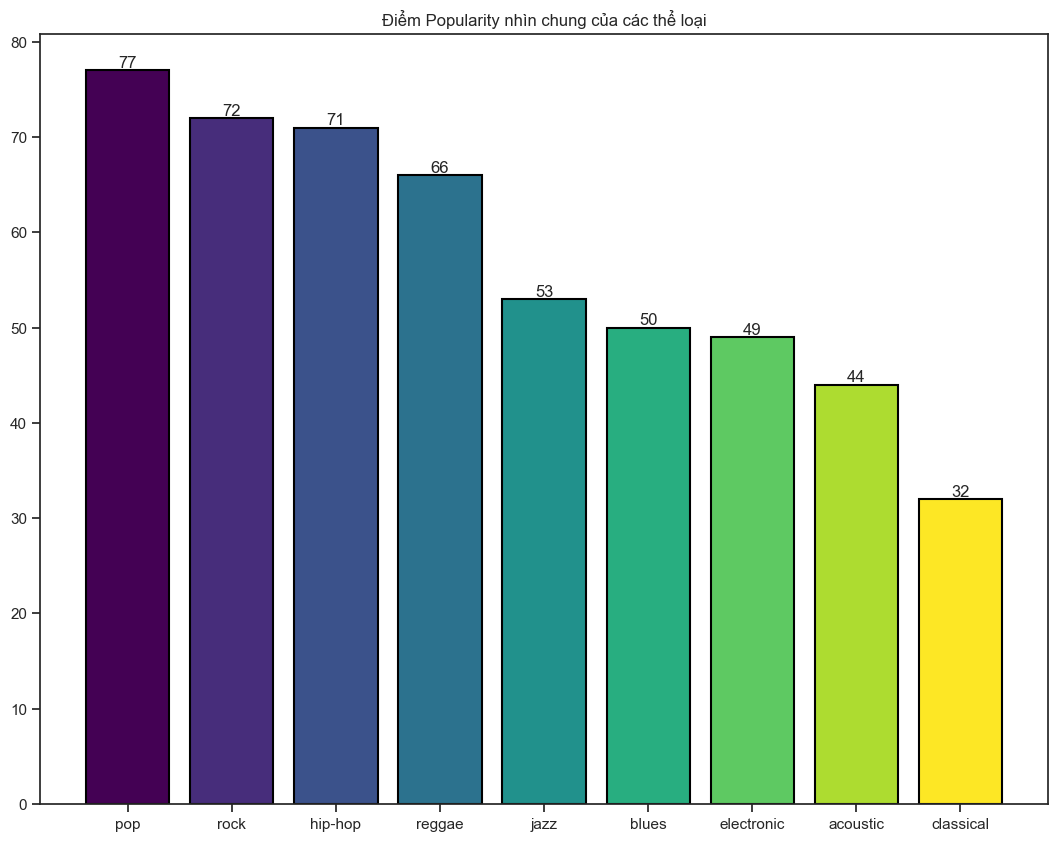

In [92]:
plt.figure(figsize=(13,10))
# plt.grid()
bar1 = plt.bar(genres_overall_popularity.index, genres_overall_popularity.astype(int), edgecolor="black", linewidth=1.5, color=plt.cm.viridis(np.linspace(0, 1, len(genres_overall_popularity))))
plt.bar_label(bar1)
plt.title("Điểm Popularity nhìn chung của các thể loại")
plt.show()

--- 
# Các thể loại chứa từ ngữ nhạy cảm

Text(0, 0.5, 'Count')

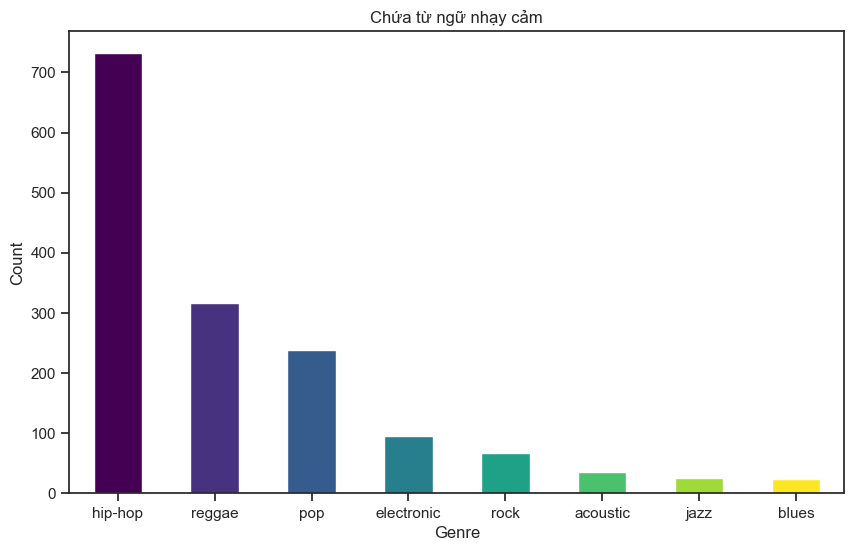

In [ ]:
explicit_by_genre = train_data[train_data['explicit'] == 1].groupby('genre')["explicit"].count().sort_values(ascending=False)
explicit_by_genre.plot(kind='bar', figsize=(10, 6), color=plt.cm.viridis(np.linspace(0, 1, len(explicit_by_genre))))
plt.title('Chứa từ ngữ nhạy cảm')
plt.xticks(rotation=0)
plt.xlabel('Genre')

plt.ylabel('Count')

---
# Phân bố các trường audio features

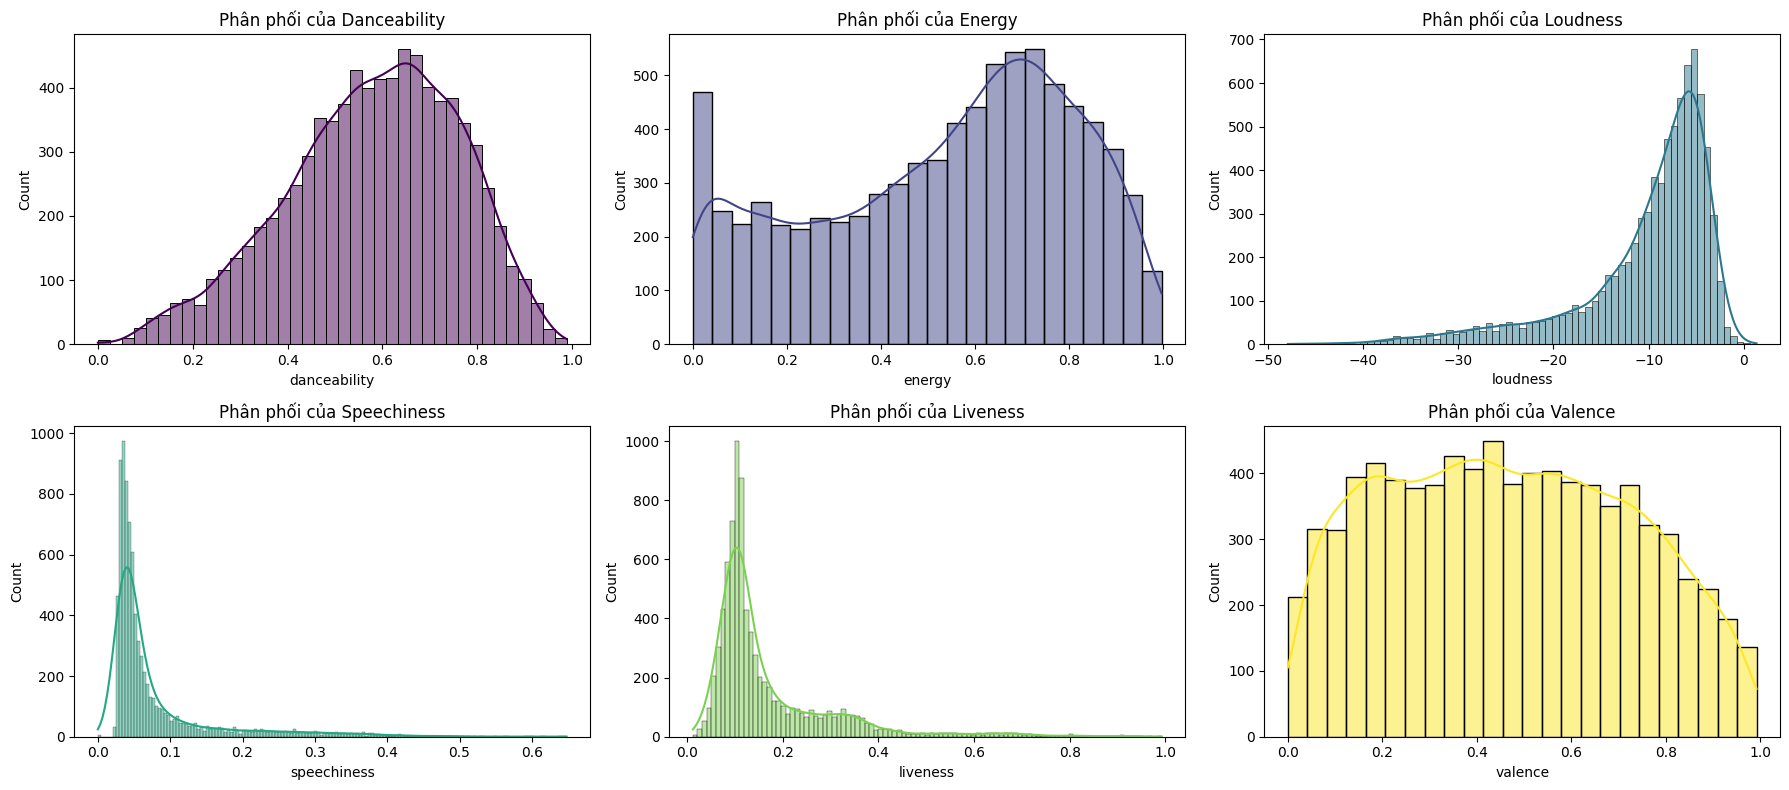

In [ ]:
features = ['danceability', 'energy', 'loudness', 
            'speechiness', 'liveness', 'valence']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=train_data, x=feature, kde=True, ax=axes[i], color=plt.cm.viridis(np.linspace(0, 1, len(features)))[i])
    axes[i].set_title(f'Phân phối của {feature.capitalize()}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
# Ma trận tương quan của các thuộc tính audio features

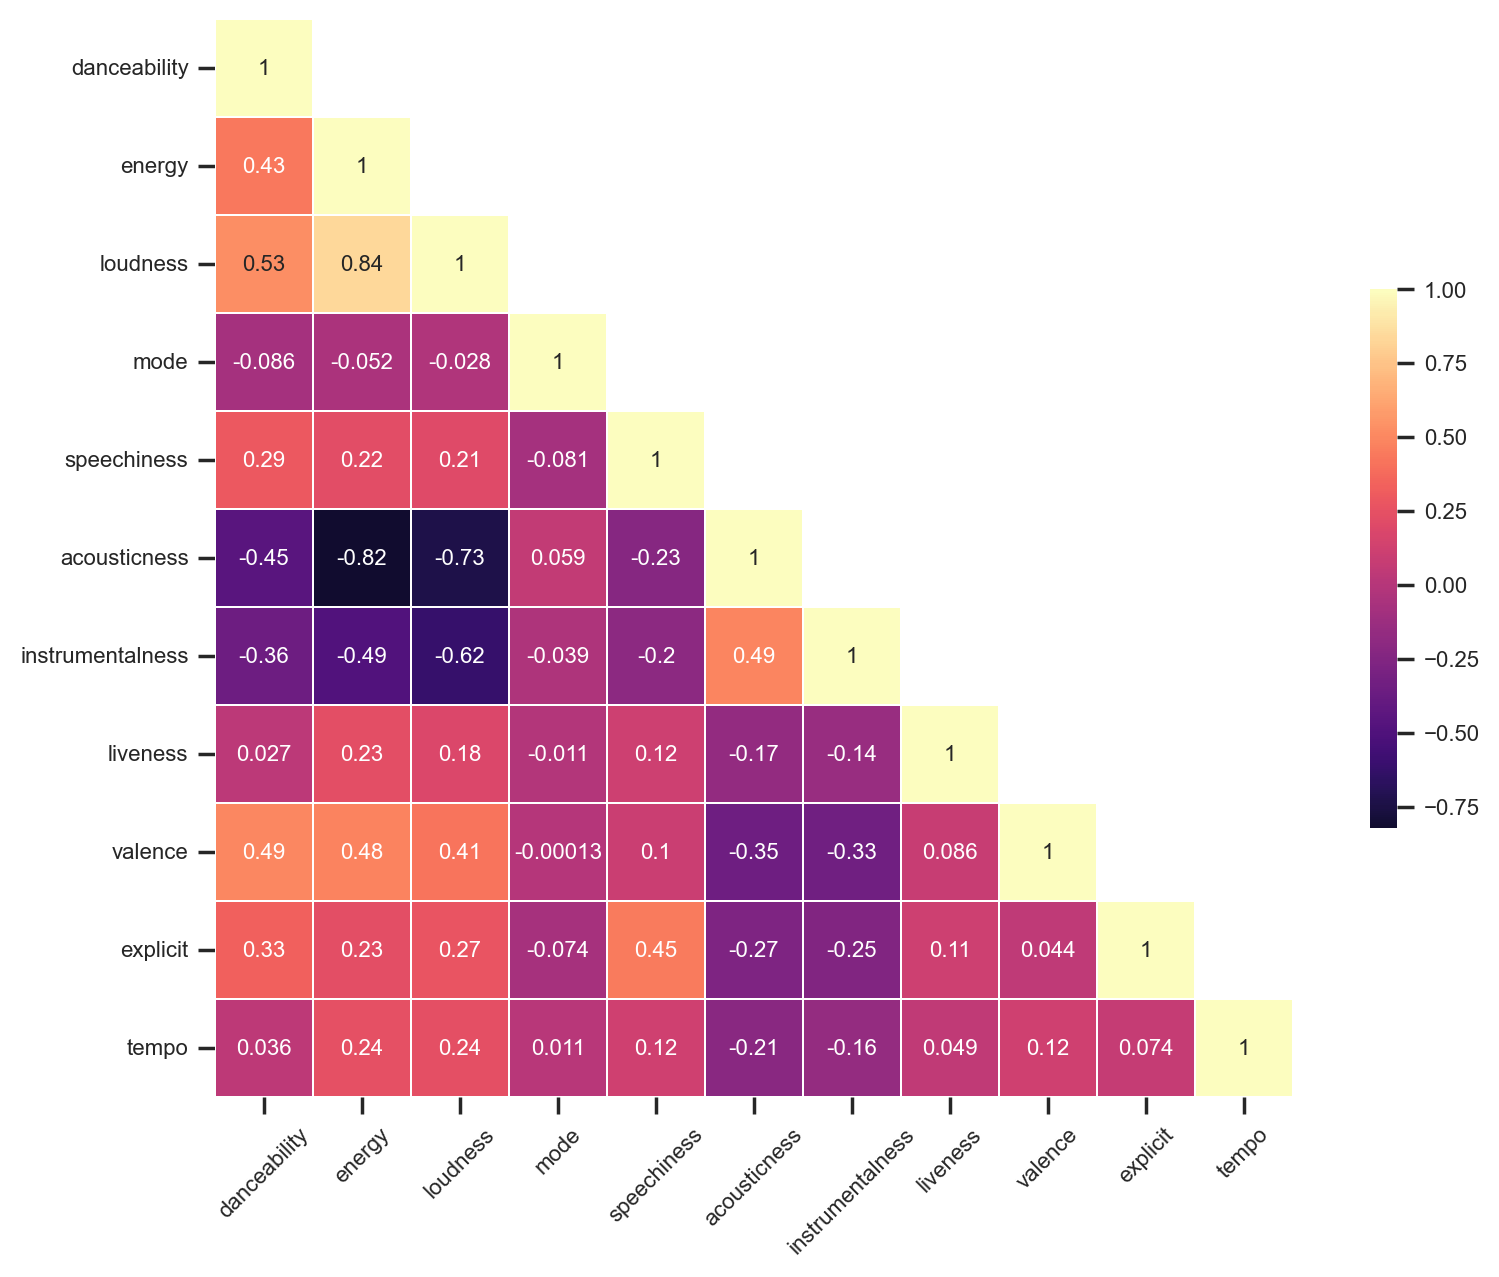

In [161]:
audio_features = ['danceability','energy', 'loudness',
                  'mode','speechiness','acousticness',
                  'instrumentalness','liveness','valence','explicit',
                  'tempo']
sns.set_theme(style="ticks")

corr = train_data[audio_features].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
for i in range(len(mask)):
    mask[i, i] = False

f, ax = plt.subplots(figsize=(10, 7), dpi=200)

heatmap = sns.heatmap(corr, mask=mask, cmap=plt.cm.magma, vmax=1, center=0,
            square=True, linewidths=0.1, annot=True, annot_kws={"size":8},cbar_kws={"shrink": .5})

ax.tick_params(axis='x', labelsize=8, rotation=45)
ax.tick_params(axis='y', labelsize=8)

heatmap.figure.axes[-1].yaxis.label.set_size(10)
heatmap.figure.axes[-1].tick_params(labelsize=8)